# **Multi Armed Bandit Problem**

The term "multi-armed bandit" comes from a hypothetical experiment where a person must choose between multiple actions, each with an unknown payout. The goal is to determine the best or most profitable outcome through a series of choices. [Ref.](https://www.optimizely.com/optimization-glossary/multi-armed-bandit/)


<!-- Despite the simplicity of the formulation and solution, this problem has
great practical value. We will study two policies for solving
the multi-armed bandits problem:

1. Epsilon greedy policy
2.  Thompson sampling policy -->


## **Scenario**

### The Casino Slot Machine Scenario

Imagine you and your friends are at a casino, excited to try your luck at the  **slot machines** (also called "one-armed bandits"). These machines work like this:

- A person puts a \$1 coin into the machine.
- With a certain **probability \( p \)**, they win $2.

- With a probability \( 1-p \), they lose the $1 coin.

*Normally, casinos set the chances of winning (𝑝) to be less than 50%, so players lose more often than they win. For example, if 𝑝=0.4, you win only 40% of the time, and the casino makes a profit.*

### What their teammate did:
- One of the team members secretly **reprogrammed one slot machine** to make it more likely to win, increasing \( p \) to **0.6**. This means there’s now a **60% chance of winning**, which gives the team an advantage.

### The problem:
- By morning, the casino staff **rearranged the slot machines**, so the team no longer knows which machine has the increased \( p \) of 0.6. All they know is that one of the machines is better than the others, but they need to figure out which one.

The challenge now is to identify the "lucky" machine with \( p = 0.6 \) as quickly as possible so they can use it to make money before the casino finds out.


###Now what can they do?

They came to the casino. They have $1000 and five one-armed bandit
machines in the row in front of them. Four of these machines have a winning
probability of less than 0.5, and in the long term, they will lose money
playing them. But one device has a probability of winning that is equal to
0.6, and in the long run, they will be able to make money on it.

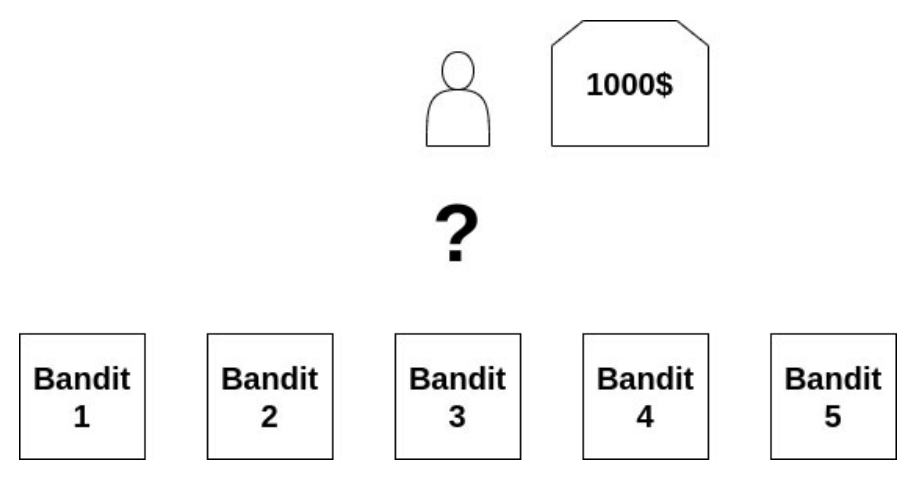

To do so they do the following: they spend $50 on the exploration process
and find the most profitable slot machine. So, they run 10 rounds on each
machine.

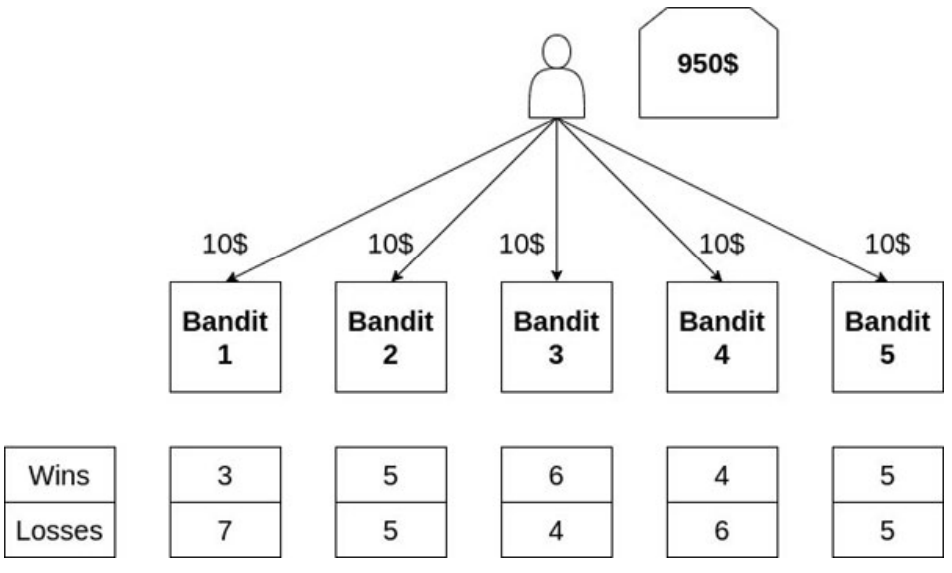

According to the statistics, the most profitable slot is **One-Armed Bandit 3**.
Therefore, they will invest all the remaining money only in it.

This scenario is an example of a **multi-armed bandit problem**, where the goal is to balance **exploration** (testing different machines to find the best one) and **exploitation** (using the best machine once you find it).

*They can increase the number of trials in the exploration process to be more likely to determine the most profitable machine. For instance, they can spend $200 on the exploration process and run each one-armed bandit 40 times. But in this case, they will spend more money on testing unprofitable machines.*

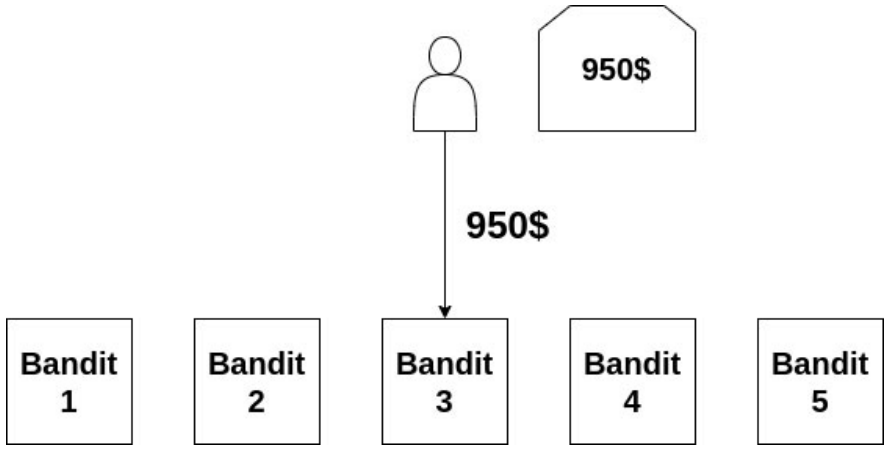

###Problem Definition

In the Multi-Armed Bandit problem, an agent is presented with multiple options
(arms), each providing a reward drawn from an unknown probability distribution.The agent aims to maximize the cumulative reward over a series of trials. The challenge lies in choosing the best arm to pull, balancing the need to explore different arms to learn about their reward distributions and exploiting the known arms that have provided high rewards.

###Formal Representation

Formally, the MAB problem can be described as follows:

***Arms:*** $K$ independent arms, each with an unknown reward distribution.

***Rewards:*** Each arm $i$ provides a reward $R\_i$​, drawn from an unknown distribution with an expected value $\mu\_i$​.

***Objective:*** Maximize the cumulative reward over $T$ trials.

### Exploration vs. Exploitation

The central dilemma in the MAB problem is the trade-off between exploration (trying different arms to gather information about their rewards) and exploitation (choosing the arm that has provided the highest rewards based on current information). Balancing these two aspects is crucial for optimizing long-term rewards.

### **Approach 1: Random Policy**
A **Random Policy** in MAB means that the algorithm selects arms (or actions) to pull randomly, without using any prior knowledge or strategy about which arm is likely to provide the best reward.

 With a Random Policy, at each turn, the algorithm would choose any machine (Machine 1, Machine 2, or Machine 3) randomly, without considering which one has the highest probability of winning.


In [ ]:
"""This code defines a custom environment simulating a multi-armed bandit problem using the OpenAI Gym framework.
It models a situation where there are multiple slot machines (bandits), each with a different probability of winning,
and the agent needs to learn which one is the best. """

import random
import gym
import numpy as np
class MultiArmedBanditEnv(gym.Env):

  # init method receives bandit winning probabilities
  def __init__(self, bandits):
    self.bandits = bandits                      # Winning probabilities for each bandit.
    self.state = {}                             # Tracks the history of rewards for each bandit. it is a dictionary
    self.reset()                                # Initialize the environment.

  # After each action, environment returns 1$ or -1$ to an agent
  def step(self, action):
    p = self.bandits[action]
    # print(f"===Value of p: {p}===")
    r = random.random()
    # print(f"===Value of r: {r}===")
    reward = 1 if r <= p else -1
    self.state[action].append(reward)
    done = False
    debug = None
    return self.state, reward, done, debug

  def reset(self):
    self.state = {}
    for i in range(len(self.bandits)):
      self.state[i] = []
    return self.state                           #self.state = {0: [],  1: [], 2: [], 3: [], 4: []   # Rewards for bandit 4}


  #  this method shows the overall statistics of all rounds
  def render(self, mode = "ascii"):
    returns = {}
    trials = {}
    for i in range(len(self.bandits)):
      returns[i] = sum(self.state[i])
      trials[i] = len(self.state[i])
    print(f'=====Total Trials: {sum(trials.values())}=====')
    for b, r in returns.items():
      t = trials[b]
      print(f'Bandit {b}| returns: {r}, trials: {t}')
    print(f'=====Total Returns: {sum(returns.values())}=====')

# environment that simulates our casino problem with 5 onearmed bandits
def get_bandit_env_5():
  bandits = [.45, .45, .6, .4, .4]
  return MultiArmedBanditEnv(bandits)



In [ ]:
#  run the environment with an agent that is guided by a random policy
if __name__ == '__main__':
  seed = 1
  random.seed(seed)
  #np.random.seed(1)
  balance = 1000
  env = get_bandit_env_5()
  state = env.reset()
  rewards = []
  for i in range(balance):
    random_bandit = random.randint(0, 4)
    print(f"===Random Bandit Selected: {random_bandit}===")
    state, reward, done, debug = env.step(random_bandit)
    print(f"====For each Balance {i}: States: {state}, Reward: {reward}=====")
    rewards.append(reward)
  env.render()
  env.close()


===Random Bandit Selected: 1===
====For each Balance 0: States: {0: [], 1: [-1], 2: [], 3: [], 4: []}, Reward: -1=====
===Random Bandit Selected: 0===
====For each Balance 1: States: {0: [1], 1: [-1], 2: [], 3: [], 4: []}, Reward: 1=====
===Random Bandit Selected: 3===
====For each Balance 2: States: {0: [1], 1: [-1], 2: [], 3: [-1], 4: []}, Reward: -1=====
===Random Bandit Selected: 3===
====For each Balance 3: States: {0: [1], 1: [-1], 2: [], 3: [-1, -1], 4: []}, Reward: -1=====
===Random Bandit Selected: 1===
====For each Balance 4: States: {0: [1], 1: [-1, 1], 2: [], 3: [-1, -1], 4: []}, Reward: 1=====
===Random Bandit Selected: 0===
====For each Balance 5: States: {0: [1, -1], 1: [-1, 1], 2: [], 3: [-1, -1], 4: []}, Reward: -1=====
===Random Bandit Selected: 3===
====For each Balance 6: States: {0: [1, -1], 1: [-1, 1], 2: [], 3: [-1, -1, -1], 4: []}, Reward: -1=====
===Random Bandit Selected: 0===
====For each Balance 7: States: {0: [1, -1, -1], 1: [-1, 1], 2: [], 3: [-1, -1, -1],

**Oberservation:** the random policy is unlikely to provide an opportunity to
make money in the casino. The result shows that reprogrammed **machine #3**
allows us to earn some money, but other machines produce a loss in the
long run.

--------------------------------------------------------------

### **Approach 2: Greedy Policy**

The Greedy Policy works in two main stages:

**Exploration Stage:**

- At the start, it tests each machine (or bandit) a set number of times (let's say 𝑛 trials per machine).

- The goal is to gather some initial information about how likely each machine is to give a reward.

**Exploitation Stage:**

- After the exploration stage is done, the policy stops trying new things.
It switches to only using the machine that seemed the best (the one with the highest reward rate during exploration).
- It does not gather any more information after this point.

In simple terms:

During exploration, it tries all machines to learn which one is the best.

During exploitation, it sticks to the best machine and ignores all others.

In [ ]:
import numpy as np

def greedy_policy(state, explore = 10):
  bandits = len(state)
  trials = sum([len(state[b]) for b in range(bandits)])
  total_explore_trials = bandits * explore
  # print(f"===Total explored trails: {total_explore_trials}===")

  # exploration
  if trials <= total_explore_trials:
    print(f"===In Exploration: {trials % bandits}===")
    return trials % bandits

  # exploitation
  print(f"===In Exploitation:===")
  avg_rewards = [sum(state[b]) / len(state[b]) for b in  range(bandits)]
  best_bandit = np.argmax(avg_rewards)
  return best_bandit

Now we will see how this policy solves the multi-armed bandit
problem

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def run_greedy_policy(balance, env, exploration = 10):
  state = env.reset()
  rewards = []

  for i in range(balance):
    action = greedy_policy(state, exploration)
    print(f"===Best Bandit: {action}===")
    state, reward, done, debug = env.step(action)
    print(f"====For each Balance {i}: States: {state}, Reward: {reward}=====")

    rewards.append(reward)

  env.close()
  return env, rewards

===In Exploration: 0===
===Best Bandit: 0===
====For each Balance 0: States: {0: [-1], 1: [], 2: [], 3: [], 4: []}, Reward: -1=====
===In Exploration: 1===
===Best Bandit: 1===
====For each Balance 1: States: {0: [-1], 1: [-1], 2: [], 3: [], 4: []}, Reward: -1=====
===In Exploration: 2===
===Best Bandit: 2===
====For each Balance 2: States: {0: [-1], 1: [-1], 2: [1], 3: [], 4: []}, Reward: 1=====
===In Exploration: 3===
===Best Bandit: 3===
====For each Balance 3: States: {0: [-1], 1: [-1], 2: [1], 3: [1], 4: []}, Reward: 1=====
===In Exploration: 4===
===Best Bandit: 4===
====For each Balance 4: States: {0: [-1], 1: [-1], 2: [1], 3: [1], 4: [-1]}, Reward: -1=====
===In Exploration: 0===
===Best Bandit: 0===
====For each Balance 5: States: {0: [-1, 1], 1: [-1], 2: [1], 3: [1], 4: [-1]}, Reward: 1=====
===In Exploration: 1===
===Best Bandit: 1===
====For each Balance 6: States: {0: [-1, 1], 1: [-1, -1], 2: [1], 3: [1], 4: [-1]}, Reward: -1=====
===In Exploration: 2===
===Best Bandit: 2=

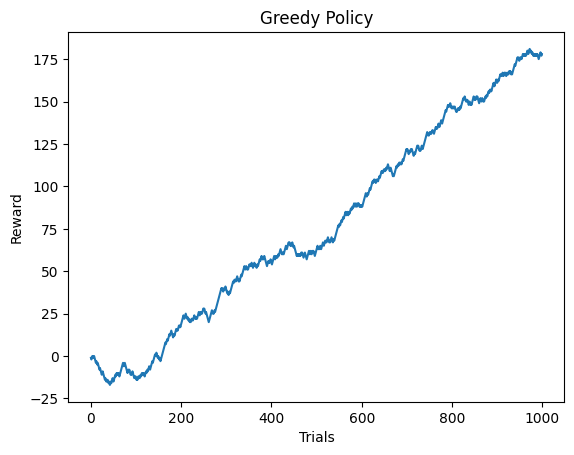

In [ ]:
if __name__ == '__main__':
  seed = 0
  random.seed(seed)
  balance = 1000
  env = get_bandit_env_5()
  env, rewards = run_greedy_policy(balance, env)
  env.render()
  cum_rewards = np.cumsum(rewards)
  plt.plot(cum_rewards)
  plt.title('Greedy Policy')
  plt.xlabel('Trials')
  plt.ylabel('Reward')
  plt.show()

### **Approach 3: Epsilon Greedy Policy**

In  Greedy policy, Once it finishes exploring, it never rechecks other machines, so it might miss changes or better options if the environment changes later.

Greedy Policy does a good job, but let's try modifying it. Let's add to the
Greedy Policy the ***possibility of remaining to explore the environment***. This
policy is called the **Epsilon Greedy Policy**. Epsilon greedy policy chooses
a random action with probability $e$, and relies solely on its experience with
probability $1-e$, that is, acts as a Greedy Policy.

**How does it work?**

The $e$ value (epsilon) represents how often the agent will explore rather than exploiting what it knows.

- If $e = 0.1$, the agent will explore (choose randomly) 10% of the time and will exploit (choose based on past experience) 90% of the time.
- If $e = 0$, it’s purely greedy (no exploration).
- If $e = 1$, it’s purely exploratory (always chooses randomly).

**Why is it better than just greedy?**
- The Epsilon Greedy Policy helps balance exploration and exploitation.
- While the Greedy Policy always picks the best-known action, the Epsilon Greedy Policy ensures that sometimes the agent will explore other options, which can lead to discovering better actions that it hadn't tried yet.

**Example:**
Imagine you are playing a game with $5$ machines (bandits), and you want to pick the one that gives the highest reward.
- **Greedy Policy:** You always pick the machine that has given you the highest reward so far, never trying the others.
- **Epsilon Greedy Policy (e = 0.1):** You pick the machine that has given you the highest reward 90% of the time, but sometimes (10% of the time), you randomly choose another machine to see if it might give you a higher reward.

In [ ]:
import random
import numpy as np



def e_greedy_policy(i, state, balance,explore = 10, epsilon = .1,epsilon_count=0):

  bandits = len(state)
  trials = sum([len(state[b]) for b in range(bandits)])
  total_explore_trials = bandits * explore
  # Calculate epsilon_exploration_trials based on epsilon
  total_epsilon_exploration_trials = int(epsilon * (balance - total_explore_trials))
  # exploration
  if trials <= total_explore_trials:
    return trials % bandits,epsilon_count

  # Calculate exploration points
  exploration_points = np.linspace(total_explore_trials+1, balance, total_epsilon_exploration_trials).astype(int)
  # Random bandit exploration at regular intervals
  if (i in exploration_points) and (epsilon_count < total_epsilon_exploration_trials):
    print(f"===Exploration at, {i}===")
    epsilon_count += 1
    return random.randint(0, bandits - 1),epsilon_count


  # exploitation
  avg_rewards = [sum(state[b]) / len(state[b]) for b in
  range(bandits)]
  best_bandit = np.argmax(avg_rewards)

  return best_bandit,epsilon_count

In [ ]:
def run_e_greedy_policy(balance, env, exploration = 10, epsilon = .1):
  state = env.reset()
  rewards = []
  epsilon_count = 0

  for i in range(balance):
    action,epsilon_count = e_greedy_policy(i, state, balance,exploration, epsilon,epsilon_count)
    print(f"===Best Bandit: {action}===")
    state, reward, done, debug = env.step(action)
    print(f"====For each Balance {i}: States: {state}, Reward: {reward}=====")

    rewards.append(reward)

  env.close()
  return env, rewards

===Best Bandit: 0===
====For each Balance 0: States: {0: [-1], 1: [], 2: [], 3: [], 4: []}, Reward: -1=====
===Best Bandit: 1===
====For each Balance 1: States: {0: [-1], 1: [-1], 2: [], 3: [], 4: []}, Reward: -1=====
===Best Bandit: 2===
====For each Balance 2: States: {0: [-1], 1: [-1], 2: [1], 3: [], 4: []}, Reward: 1=====
===Best Bandit: 3===
====For each Balance 3: States: {0: [-1], 1: [-1], 2: [1], 3: [1], 4: []}, Reward: 1=====
===Best Bandit: 4===
====For each Balance 4: States: {0: [-1], 1: [-1], 2: [1], 3: [1], 4: [-1]}, Reward: -1=====
===Best Bandit: 0===
====For each Balance 5: States: {0: [-1, 1], 1: [-1], 2: [1], 3: [1], 4: [-1]}, Reward: 1=====
===Best Bandit: 1===
====For each Balance 6: States: {0: [-1, 1], 1: [-1, -1], 2: [1], 3: [1], 4: [-1]}, Reward: -1=====
===Best Bandit: 2===
====For each Balance 7: States: {0: [-1, 1], 1: [-1, -1], 2: [1, 1], 3: [1], 4: [-1]}, Reward: 1=====
===Best Bandit: 3===
====For each Balance 8: States: {0: [-1, 1], 1: [-1, -1], 2: [1, 1

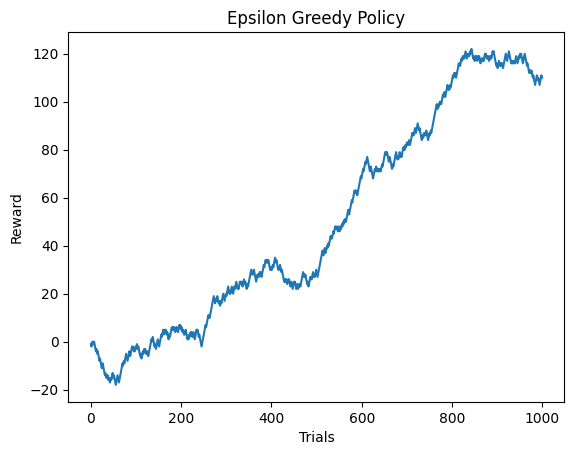

In [ ]:
if __name__ == '__main__':
  seed = 0
  random.seed(seed)
  balance = 1_000
  env = get_bandit_env_5()
  env, rewards = run_e_greedy_policy(balance, env)
  env.render()
  cum_rewards = np.cumsum(rewards)
  plt.plot(cum_rewards)
  plt.title('Epsilon Greedy Policy')
  plt.xlabel('Trials')
  plt.ylabel('Reward')
  plt.show()

### **Approach 4: Upper Confidence Bound (UCB) Policy**

The Epsilon-Greedy algorithm sometimes explores actions randomly, without considering the information it already has. For instance, if one action has shown much better performance than others, Epsilon-Greedy might still choose a poorly performing action during exploration, leading to inefficiency.

UCB uses the principle of optimism in the face of uncertainty. It maintains a balance between exploring actions that have not been fully tried yet and exploiting actions that seem to have been successful based on past experience. It does this by choosing actions with the highest upper confidence bound, which is a combination of both the average reward and the uncertainty (variance) of that action.

**How UCB Works**

- ***Initialization***: Play each action once to gather initial data.
- ***Selection***: For each trial, calculate the UCB value for each action. Select the action with the highest UCB value.
For each bandit (or action), UCB calculates an upper confidence bound using the following formula:

\begin{equation}
UCB(a) = \hat{Q}_a + \sqrt{\frac{2 \ln t}{N_a}}
\end{equation}

Where:
- $ \hat{Q}_a $: The estimated **average reward** for action $ a $, based on past rewards.
- $ t $: The total number of actions taken so far (the total trials).
- $ N_a $: The number of times action $ a $ has been selected (how often bandit $ a $ was played).
- ***Update***: After taking the action, update the reward statistics for that action (average reward and trial count).-

In [ ]:
def ucb_policy(state, t):
    bandits = len(state)
    avg_rewards = [
        sum(state[b]) / len(state[b]) if len(state[b]) > 0 else 0
        for b in range(bandits)
    ]

    # Add confidence bounds for exploration
    confidence_bounds = [
        avg_rewards[b] + np.sqrt((2 * np.log(t + 1)) / len(state[b]))
        if len(state[b]) > 0 else float('inf')  # Handle unvisited bandits
        for b in range(bandits)
    ]
    best_bandit = np.argmax(confidence_bounds)
    return best_bandit


def run_ucb_policy(balance, env):
    state = env.reset()
    rewards = []

    for t in range(balance):
        action = ucb_policy(state, t)
        print(f"Trial {t + 1}: Selected Bandit: {action}")
        state, reward, done, debug = env.step(action)
        print(f"Trial {t + 1}: Reward: {reward}, State: {state}")
        rewards.append(reward)

    env.close()
    return env, rewards

Trial 1: Selected Bandit: 0
Trial 1: Reward: -1, State: {0: [-1], 1: [], 2: [], 3: [], 4: []}
Trial 2: Selected Bandit: 1
Trial 2: Reward: -1, State: {0: [-1], 1: [-1], 2: [], 3: [], 4: []}
Trial 3: Selected Bandit: 2
Trial 3: Reward: 1, State: {0: [-1], 1: [-1], 2: [1], 3: [], 4: []}
Trial 4: Selected Bandit: 3
Trial 4: Reward: 1, State: {0: [-1], 1: [-1], 2: [1], 3: [1], 4: []}
Trial 5: Selected Bandit: 4
Trial 5: Reward: -1, State: {0: [-1], 1: [-1], 2: [1], 3: [1], 4: [-1]}
Trial 6: Selected Bandit: 2
Trial 6: Reward: 1, State: {0: [-1], 1: [-1], 2: [1, 1], 3: [1], 4: [-1]}
Trial 7: Selected Bandit: 3
Trial 7: Reward: -1, State: {0: [-1], 1: [-1], 2: [1, 1], 3: [1, -1], 4: [-1]}
Trial 8: Selected Bandit: 2
Trial 8: Reward: 1, State: {0: [-1], 1: [-1], 2: [1, 1, 1], 3: [1, -1], 4: [-1]}
Trial 9: Selected Bandit: 2
Trial 9: Reward: 1, State: {0: [-1], 1: [-1], 2: [1, 1, 1, 1], 3: [1, -1], 4: [-1]}
Trial 10: Selected Bandit: 2
Trial 10: Reward: 1, State: {0: [-1], 1: [-1], 2: [1, 1, 1

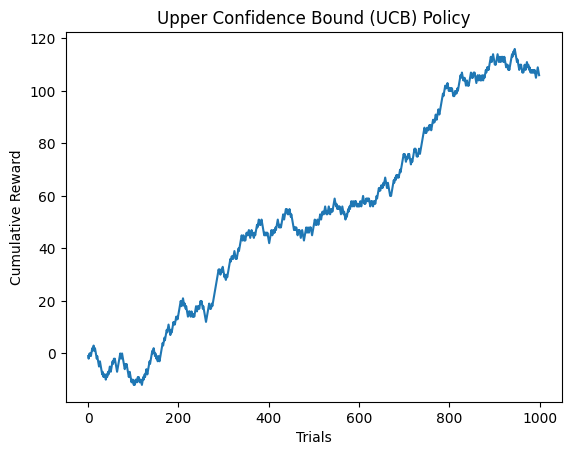

In [ ]:
if __name__ == '__main__':
    import matplotlib.pyplot as plt

    seed = 0
    random.seed(seed)
    balance = 1000
    env = get_bandit_env_5()

    # Run UCB Policy
    env, rewards = run_ucb_policy(balance, env)
    env.render()

    # Plot cumulative rewards
    cum_rewards = np.cumsum(rewards)
    plt.plot(cum_rewards)
    plt.title('Upper Confidence Bound (UCB) Policy')
    plt.xlabel('Trials')
    plt.ylabel('Cumulative Reward')
    plt.show()

### **Exploration vs. exploitation**

At first, the **agent's behavior** is aimed at **collecting data**. Then, we begin to **take actions solely based on the analysis** of the data that we have collected, combining this with the **continuation of the exploration process**. After that, the **exploration process is minimal**, and agent **policy acts in exploitation mode**.



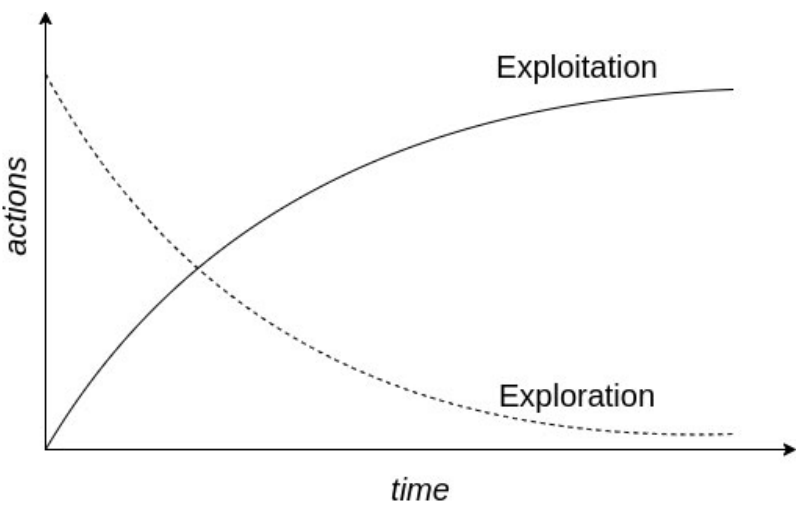

## ***Points to remember***



1.   Multi-armed bandit problem has practical applications in advertising, clinical trials, marketing, etc.
2.   Greedy Policy doesn't allow any exploration actions after switching to
exploitation mode.
3. Epsilon greedy policy allows random exploration actions.
4. Upper Confidence Bound (UCB) Policy strikes a balance between exploration and exploitation by incorporating a confidence term that prioritizes bandits with less exploration, ensuring efficient learning while minimizing resource loss.
5. Long-term exploration provokes a significant loss of resources, while
short exploration threatens the lack of information about the
environment.








## **Real-life Applications:**

### **Online advertising**

You are an online advertiser deciding which ads to show to maximize clicks and revenue. You have multiple ads to choose from, and each ad has a different probability of being clicked based on user behavior. However, you don’t know the exact click-through rate (CTR) of each ad initially.

<br>

### **Clinical trials**

In clinical trials, you have several treatments (drugs or therapies), but the effectiveness of each treatment is unknown. The goal is to identify the most effective treatment while ensuring that participants are not unnecessarily exposed to less effective or risky treatments.

## **Additional Excercises:**

1. We have several ad types, and we need to figure out which one gets the most clicks from users. Each ad type has a certain probability of being clicked. The goal is to maximize the total number of clicks.

Ad Types and Click Probabilities:

-	Toys & Games: 10% chance of being clicked
-	Cars: 30% chance of being clicked
-	Sports: 40% chance of being clicked
-	Holiday Packages: 35% chance of being clicked
-	Foods & Health: 25% chance of being clicked

In this setup:
-	**Arms:** Different ad types to offer
-	**Reward:** 1 if the ad is clicked, 0 otherwise

Implement the MAB algorithm to discover which ad type has the highest click rate, so we can recommend it to other users.


 2. In a clinical trial, we are testing a new drug across different patient groups to determine which group responds best to the drug. Our goal is to identify the most effective treatment plan quickly while minimizing the number of patients exposed to less effective treatments.

The clinical trial tests different doses of the drug, and each dose has a different probability of improving patient health. The goal is to maximize the number of patients who show improvement, which is measured by a binary outcome:
**1 if the patient improves, and 0 if the patient does not improve.**

Drug Dosage and Success Probabilities:
-	Low Dose: 25% chance of improvement
-	Medium Dose: 40% chance of improvement
-	High Dose: 55% chance of improvement

Setup:

-	Arms: The different drug dosages (Low, Medium, High)
-	Reward: 1 if the patient improves (i.e., the drug is effective), 0 otherwise

Using the Multi-Armed Bandit (MAB) algorithm, determine which drug dosage has the highest success rate so that we can allocate more patients to the most effective dosage.


More References:
1. https://towardsdatascience.com/solving-the-multi-armed-bandit-problem-b72de40db97c
3. https://www.kaggle.com/code/parsasam/reinforcement-learning-notes-multi-armed-bandits
4. https://www.kaggle.com/code/ilialar/simple-multi-armed-bandit
5. https://jamesrledoux.com/algorithms/bandit-algorithms-epsilon-ucb-exp-python/